In [316]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import math

from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

plt.rcParams.update({'font.size': 12})

In [461]:
def epidemic_model(dt, n_iter, alpha, beta, gamma, n_i, n_d, D_0, B_0, I_0):

    Ds = np.zeros(n_iter, dtype=int)
    Ds[0] = D_0
    Bs = np.zeros(n_iter, dtype=int)
    Bs[0] = B_0
    Is = np.zeros(n_iter, dtype=int)
    Is[0] = I_0
    ts = np.zeros(n_iter, dtype=float)

    D = D_0
    B = B_0
    I = I_0
    
    for i in range(n_iter-1):

        a = np.random.poisson(alpha*Ds[i]*Bs[i - n_i]*dt)
        b = np.random.poisson(gamma*Is[i - n_d]*dt)
        c = np.random.poisson(beta*Bs[i]*dt)

        D = Ds[i] - a + b
        B = Bs[i] + a - c
        I = Is[i] + c - b
        
        if D < 0:

            D, B = D - D, B + D
        
        if B < 0:

            B, I = B - B, I + B
        
        if I < 0:

            I, D = I - I, D + I

        Ds[i+1] = D
        Bs[i+1] = B
        Is[i+1] = I
        ts[i+1] = ts[i] + dt
        
    return Ds, Bs, Is, ts

In [486]:
N = 1000
dt = 0.01
n_iter = 10000
alpha= 0.001
beta = 0.25
gamma = 0.21
n_i = 10
n_d = 3000
D_0 = round(0.99*N)
B_0 = round(0.01*N)
I_0 = round(0.00*N)

Ds, Bs, Is, ts = epidemic_model(dt=dt, n_iter=n_iter, alpha=alpha, beta=beta, gamma=gamma,n_i=n_i,n_d=n_d,D_0=D_0,B_0=B_0,I_0=I_0)

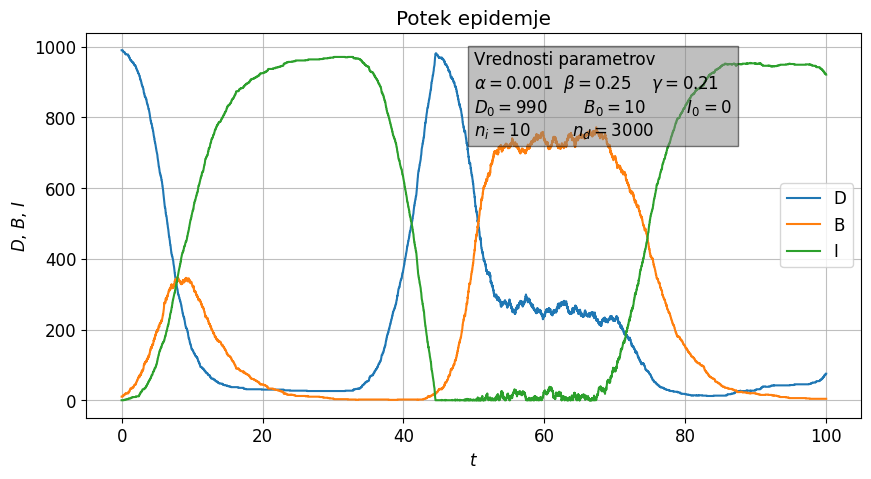

In [487]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title(r'Potek epidemje')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$D$, $B$, $I$')
ax.text(n_iter*dt/2, 3/4 * N, f'Vrednosti parametrov \n'
        + r'$\alpha=$' + f'{alpha} \t' + r'$\beta=$' + f'{beta} \t' + r'$\gamma=$' + f'{gamma} \n'
        + r'$D_0=$' + f'{D_0} \t' + r'$B_0=$' + f'{B_0} \t' + r'$I_0=$' + f'{I_0} \n'
        + r'$n_i=$' + f'{n_i} \t' + r'$n_d=$' + f'{n_d}', bbox={'facecolor': 'grey', 'alpha':0.5})
ax.grid(alpha=0.8)
ax.plot(ts, Ds, label='D')
ax.plot(ts, Bs, label='B')
ax.plot(ts, Is, label='I')
ax.legend()

In [479]:
print(np.where(Bs==0)[0][0]) # Indeks prve ničle 

217


1

In [515]:
dt = 0.01
n_iter = 50000
alpha= 0.001
beta = 0.25
n_i = 10
n_d = 3000
D_0 = round(0.99*N)
B_0 = round(0.01*N)
I_0 = round(0.00*N)

Ns = np.arange(100, 1000, 100, dtype=int)
gammas = np.round(np.logspace(-2., 0., 8), 2)

t_death_average = np.zeros((len(Ns), len(gammas)))
t_death_median = np.zeros((len(Ns), len(gammas)))
t_death_std = np.zeros((len(Ns), len(gammas)))

num_iter = 200 # Stevilo ponovitev za vsak scenarij

for i, N in enumerate(Ns):

    print(i/len(Ns))

    for j, gamma in enumerate(gammas):

        print(j/len(gammas))

        t_death = np.zeros(num_iter)

        for k in range(num_iter):

            Ds, Bs, Is, ts = epidemic_model(dt=dt, n_iter=n_iter, alpha=alpha, beta=beta, gamma=gamma,n_i=n_i,n_d=n_d,D_0=D_0,B_0=B_0,I_0=I_0)

            try:
                index = np.where(Bs==0)[0][0]
            except:
                index = -1
            
            t_death[k] = ts[index]

        t_death_average[i][j] = np.average(t_death)
        t_death_median[i][j] = np.median(t_death)
        t_death_std[i][j] = np.std(t_death)

0.0
0.0
0.125
0.25
0.375
0.5
0.625
0.75
0.875
0.1111111111111111
0.0
0.125
0.25
0.375
0.5
0.625
0.75
0.875
0.2222222222222222
0.0
0.125
0.25
0.375
0.5
0.625
0.75
0.875
0.3333333333333333
0.0
0.125
0.25
0.375
0.5
0.625
0.75
0.875
0.4444444444444444
0.0
0.125
0.25
0.375
0.5
0.625
0.75
0.875
0.5555555555555556
0.0
0.125
0.25
0.375
0.5
0.625
0.75
0.875
0.6666666666666666
0.0
0.125
0.25
0.375
0.5
0.625
0.75
0.875
0.7777777777777778
0.0
0.125
0.25
0.375
0.5
0.625
0.75
0.875
0.8888888888888888
0.0
0.125
0.25
0.375
0.5
0.625
0.75
0.875


In [541]:
print(np.arange(len(Ns)), Ns.astype(str))

[0 1 2 3 4 5 6 7 8] ['100' '200' '300' '400' '500' '600' '700' '800' '900']


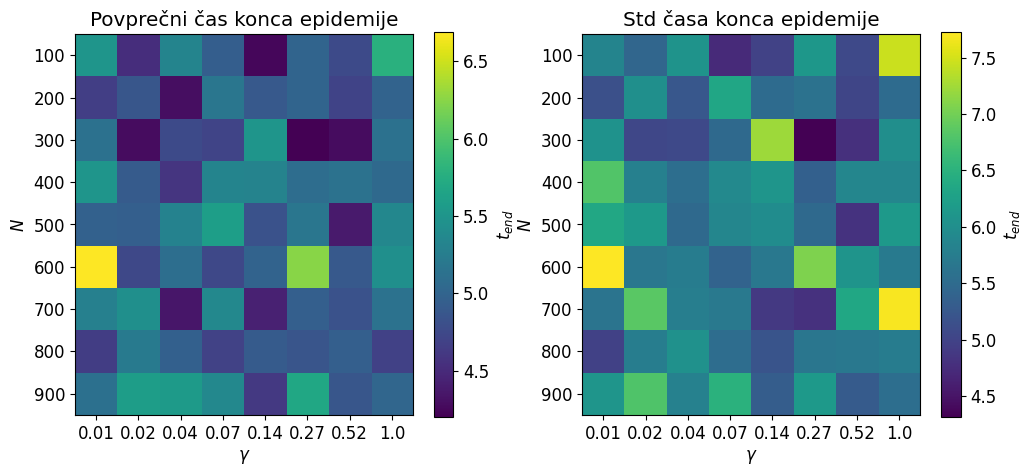

In [560]:
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
im = ax1.imshow(t_death_average, cmap='viridis', interpolation='nearest')
ax1.set_title('Povprečni čas konca epidemije')
ax1.set_ylabel(r'$N$')
ax1.set_xlabel(r'$\gamma$')
ax1.set_yticks(np.arange(len(Ns)))
ax1.set_yticklabels(Ns)
ax1.set_xticks(np.arange(len(gammas)))
ax1.set_xticklabels(gammas)

# Adding colorbar
cbar = fig.colorbar(im, ax=ax1)
cbar.set_label(r'$t_{end}$')


ax2 = fig.add_subplot(1, 2, 2)
im = ax2.imshow(t_death_std, cmap='viridis', interpolation='nearest')
ax2.set_title('Std časa konca epidemije')
ax2.set_ylabel(r'$N$')
ax2.set_xlabel(r'$\gamma$')
ax2.set_yticks(np.arange(len(Ns)))
ax2.set_yticklabels(Ns)
ax2.set_xticks(np.arange(len(gammas)))
ax2.set_xticklabels(gammas)

# Adding colorbar
cbar = fig.colorbar(im, ax=ax2)
cbar.set_label(r'$t_{end}$')
plt.show()
